In [3]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.colors import to_rgba
import matplotlib
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cairosvg
import io
matplotlib.rcParams['text.usetex'] = True

# Define a function to convert Julia complex format to Python complex format
def julia_to_python_complex(julia_str):

    cleaned_str = julia_str.strip().replace(" ", "").replace("im", "j")
    
    return complex(cleaned_str) 

def Rplus(k, r):
    return np.sqrt( (1-k)**2*r + k*k )/np.sqrt(r)

def Rminus(k, r):
    k_c = 1/ (1 + 1/np.sqrt(r))
    if k > k_c:
        return 0
        
    return np.sqrt( (1-k)**2*r - k*k )/np.sqrt(r)

# Figure 1 (saved as .png)

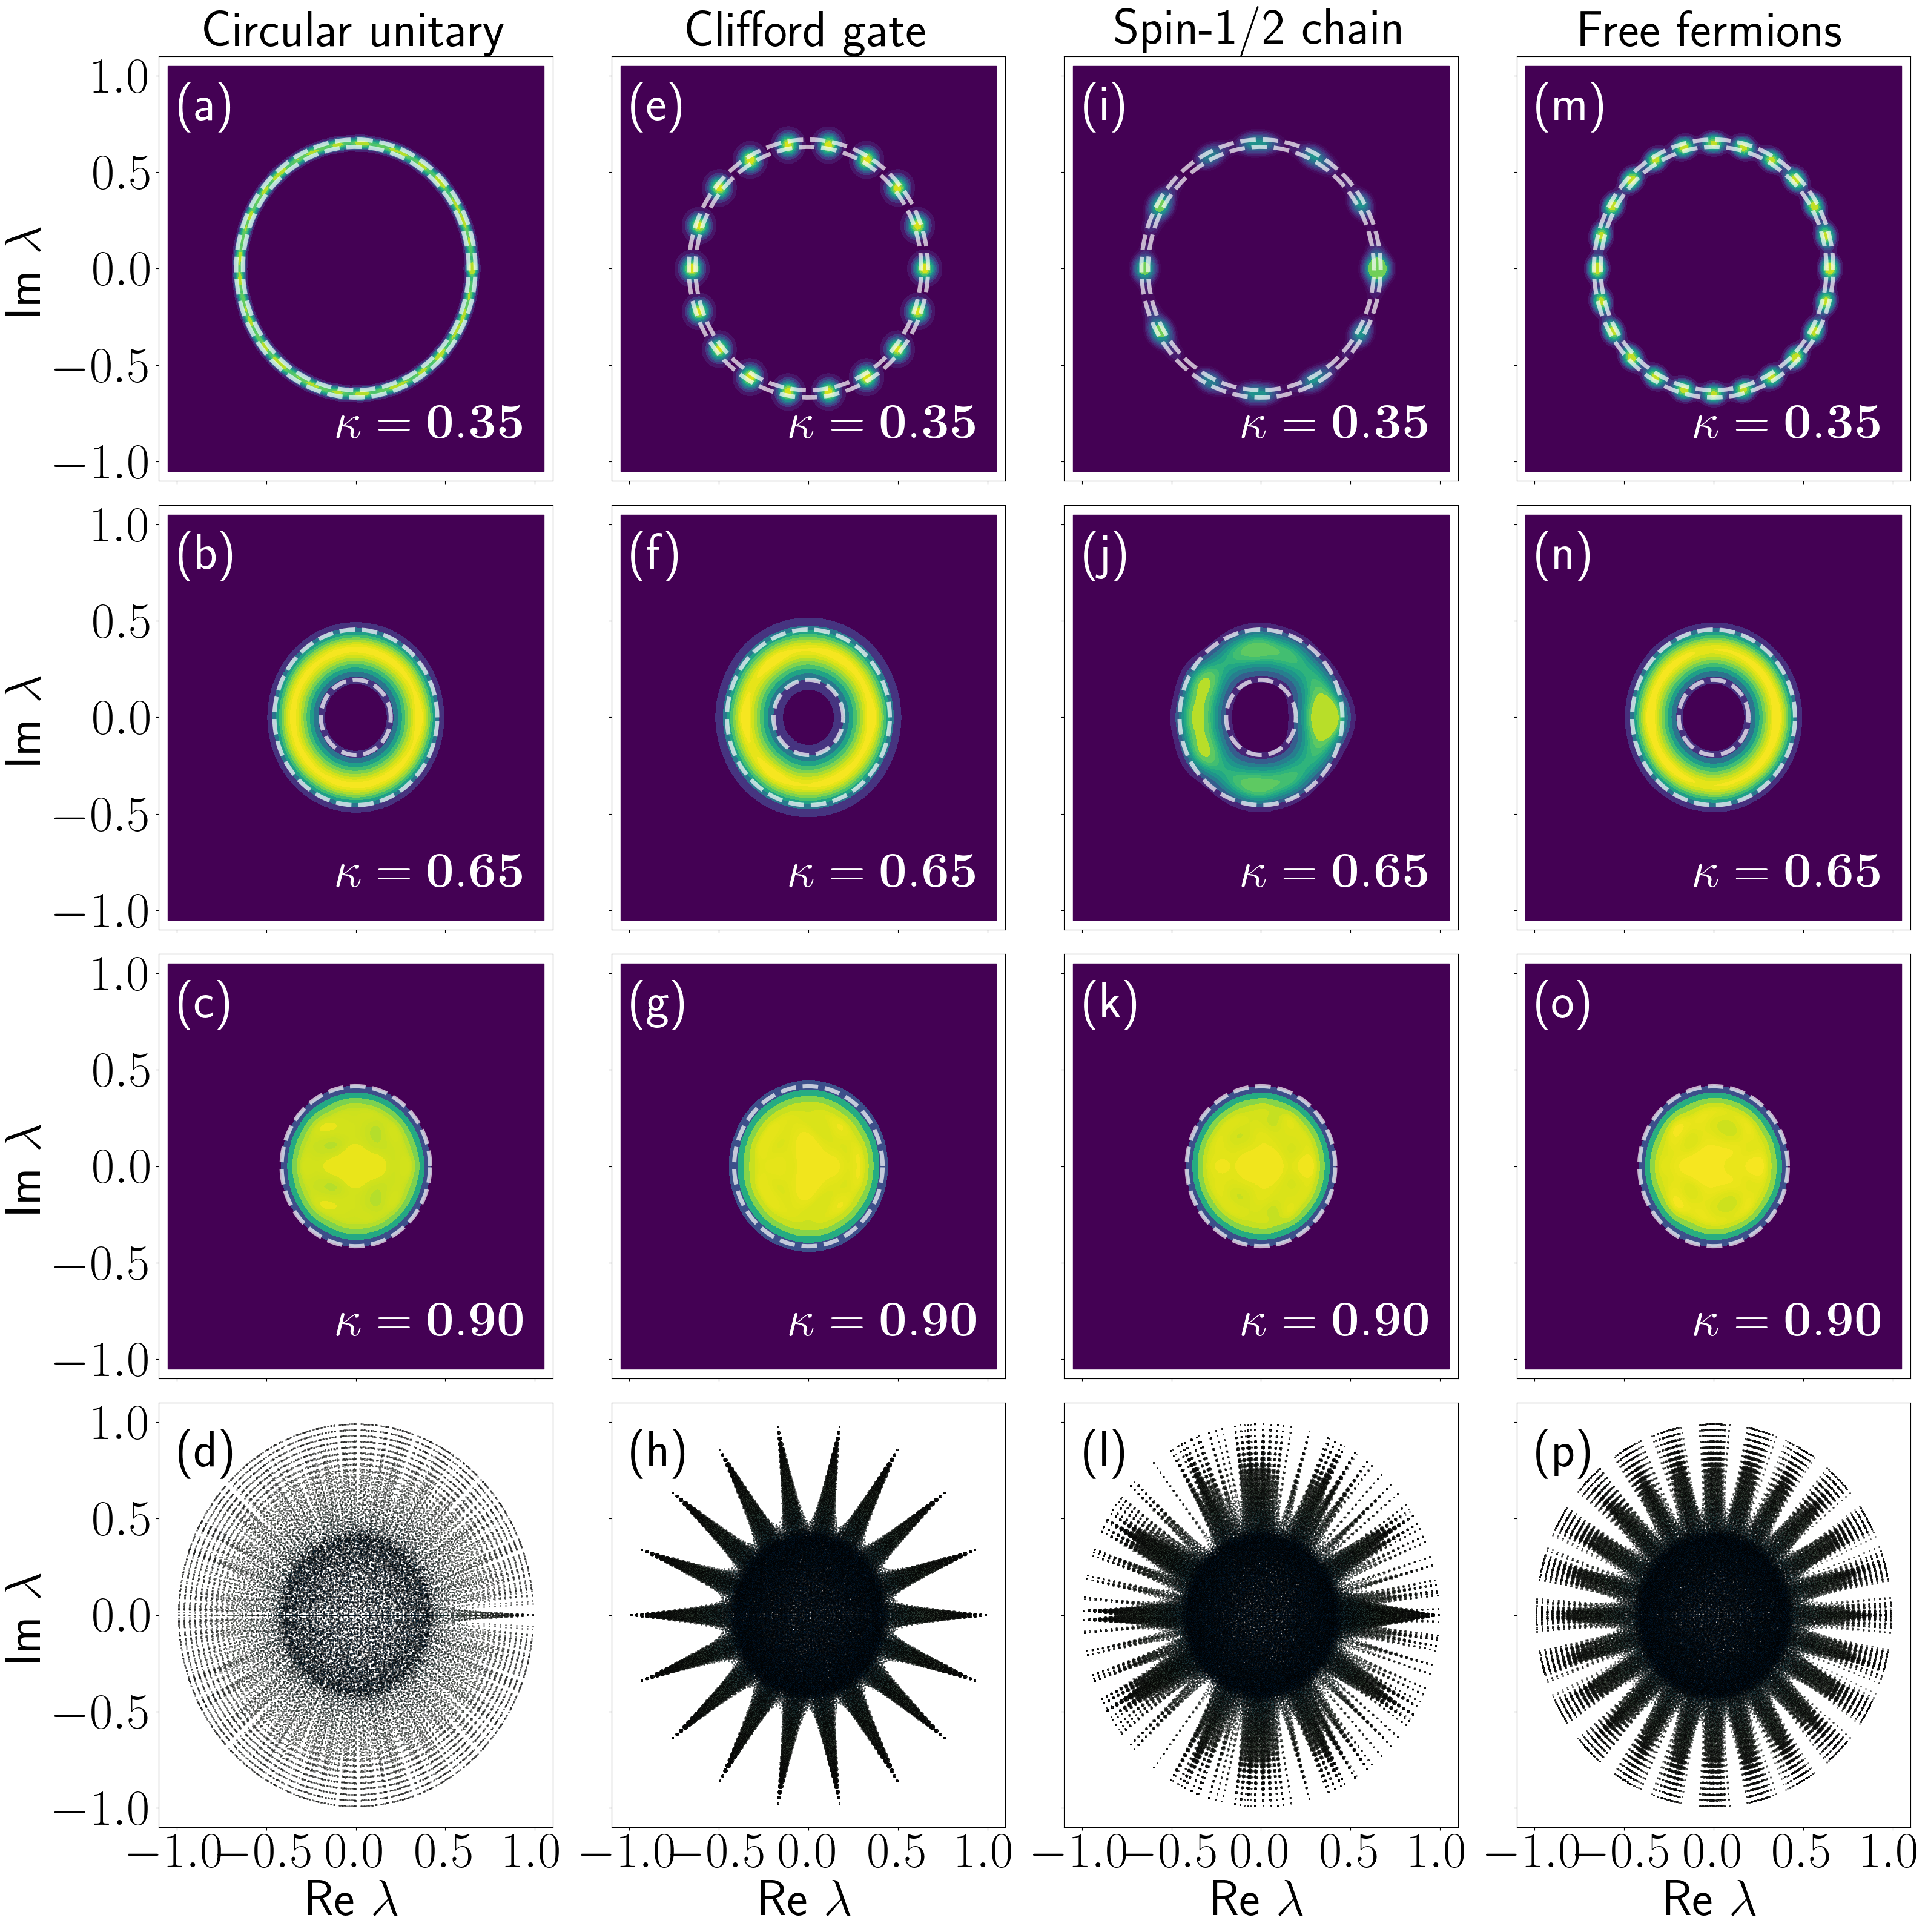

In [5]:
# PARAMETERS

r = 5
vec_k = list(np.around(np.arange(0.01, 1.01, 0.01), 2))
dk = 3
k = [0.35, 0.65, 0.9]

#===============================================================
# GET DATA

with open("./../files/eig_CUE_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    spec_CUE = []
    for j in range(len(k)):
        
        index = vec_k.index(k[j])
        spec = lines[1+3*index].split(',')
        
        for i in range(len(spec)):
            spec[i] = julia_to_python_complex(spec[i])
        spec.pop()
        spec_CUE.append(spec)

with open("./../files/eig_CUE_L5_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    traj_CUE = []

    for j in range(0, len(vec_k), dk):

        traj = lines[1 + 3*j].split(',')

        for i in range(len(traj)):
            traj[i] = julia_to_python_complex(traj[i])
        traj.pop()
        traj_CUE.append(traj)

with open("./../files/eig_Clif_L6_r5_c18_v2.dat", 'r') as f:
    lines=f.readlines()
    spec_Clif = []
    for j in range(len(k)):
        
        index = vec_k.index(k[j])
        spec = lines[1+3*index].split(',')
        
        for i in range(len(spec)):
            spec[i] = julia_to_python_complex(spec[i])
        spec.pop()
        spec_Clif.append(spec)

    traj_Clif = []

    for j in range(0, len(vec_k), dk):

        traj = lines[1 + 3*j].split(',')

        for i in range(len(traj)):
            traj[i] = julia_to_python_complex(traj[i])
        traj.pop()
        traj_Clif.append(traj)

with open("./../files/eig_X_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    spec_X = []
    for j in range(len(k)):
        
        index = vec_k.index(k[j])
        spec = lines[1+3*index].split(',')
        
        for i in range(len(spec)):
            spec[i] = julia_to_python_complex(spec[i])
        spec.pop()
        spec_X.append(spec)

    
    traj_X = []

    for j in range(0, len(vec_k), dk):

        traj = lines[1 + 3*j].split(',')

        for i in range(len(traj)):
            traj[i] = julia_to_python_complex(traj[i])
        traj.pop()
        traj_X.append(traj)

with open("./../files/eig_FF_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    spec_FF = []
    for j in range(len(k)):
        
        index = vec_k.index(k[j])
        spec = lines[1+3*index].split(',')
        
        for i in range(len(spec)):
            spec[i] = julia_to_python_complex(spec[i])
        spec.pop()
        spec_FF.append(spec)

    
    traj_FF = []

    for j in range(0, len(vec_k), dk):

        traj = lines[1 + 3*j].split(',')

        for i in range(len(traj)):
            traj[i] = julia_to_python_complex(traj[i])
        traj.pop()
        traj_FF.append(traj)
    
#===============================================================
# PLOT POINTS

cmap = plt.get_cmap('GnBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(traj_X))]

fig, ax = plt.subplots(4, 4, figsize=(32, 32))  # Adjusted figsize for a single plot

theta = np.linspace(0, 2* np.pi, 100)


for i in range(len(k)):
    adjust = 1.0
    if i == 0:
        adjust = 0.2
        
    ax[i][0].fill_betweenx(y=[-1.05, 1.05], x1=-1.05, x2=1.05, color='#440154', zorder=0)  # Draw the square in the background

    re = [num.real for num in spec_CUE[i]]
    im = [num.imag for num in spec_CUE[i]]
   
    sns.kdeplot(x=re, y=im, cmap="viridis", fill=True, bw_adjust=adjust, cbar=False, thresh=0.1, clip=[[-1.05, 1.05], [-1.05, 1.05]], ax=ax[i][0])

    x = Rplus(k[i], r)*np.cos(theta)
    y = Rplus(k[i], r)*np.sin(theta)
    ax[i][0].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')

    x = Rminus(k[i], r)*np.cos(theta)
    y = Rminus(k[i], r)*np.sin(theta)
    ax[i][0].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')

for i in range(len(traj_CUE)):
    re = [num.real for num in traj_CUE[i]]
    im = [num.imag for num in traj_CUE[i]]
    
    ax[3][0].scatter(re, im, color=colors[i], marker='o', s=1, alpha=0.6, ec='black', lw=1)
  

for i in range(len(k)):

    adjust = 1.0
    if i == 0:
        adjust = 0.3
    
    ax[i][1].fill_betweenx(y=[-1.05, 1.05], x1=-1.05, x2=1.05, color='#440154', zorder=0)  # Draw the square in the background

    re = [num.real for num in spec_Clif[i]]
    im = [num.imag for num in spec_Clif[i]]
    
    sns.kdeplot(x=re, y=im, cmap="viridis", fill=True, bw_adjust=adjust, cbar=False, thresh=0.05, clip=[[-1.05, 1.05], [-1.05, 1.05]], ax=ax[i][1])
    
    x = Rplus(k[i], r)*np.cos(theta)
    y = Rplus(k[i], r)*np.sin(theta)
    ax[i][1].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')

    x = Rminus(k[i], r)*np.cos(theta)
    y = Rminus(k[i], r)*np.sin(theta)
    ax[i][1].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')

for i in range(len(traj_Clif)):
    re = [num.real for num in traj_Clif[i]]
    im = [num.imag for num in traj_Clif[i]]
    
    ax[3][1].scatter(re, im, color=colors[i], marker='o', s=1, alpha=0.6, ec='black', lw=1)


for i in range(len(k)):
    
    adjust = 1.0
    if i == 0:
        adjust = 0.3
        
    ax[i][2].fill_betweenx(y=[-1.05, 1.05], x1=-1.05, x2=1.05, color='#440154', zorder=0)  # Draw the square in the background

    re = [num.real for num in spec_X[i]]
    im = [num.imag for num in spec_X[i]]

    sns.kdeplot(x=re, y=im, cmap="viridis", fill=True, bw_adjust=adjust, cbar=False, thresh=0.1, clip=[[-1.05, 1.05], [-1.05, 1.05]], ax=ax[i][2])

    x = Rplus(k[i], r)*np.cos(theta)
    y = Rplus(k[i], r)*np.sin(theta)
    ax[i][2].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')

    x = Rminus(k[i], r)*np.cos(theta)
    y = Rminus(k[i], r)*np.sin(theta)
    ax[i][2].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')


for i in range(len(traj_X)):
    re = [num.real for num in traj_X[i]]
    im = [num.imag for num in traj_X[i]]
    
    ax[3][2].scatter(re, im, color=colors[i], marker='o', s=1, alpha=0.6, ec='black', lw=1)

for i in range(len(k)):
    
    adjust = 1.0
    if i == 0:
        adjust = 0.3
        
    ax[i][3].fill_betweenx(y=[-1.05, 1.05], x1=-1.05, x2=1.05, color='#440154', zorder=0)  # Draw the square in the background

    re = [num.real for num in spec_FF[i]]
    im = [num.imag for num in spec_FF[i]]

    sns.kdeplot(x=re, y=im, cmap="viridis", fill=True, bw_adjust=adjust, cbar=False, thresh=0.1, clip=[[-1.05, 1.05], [-1.05, 1.05]], ax=ax[i][3])

    x = Rplus(k[i], r)*np.cos(theta)
    y = Rplus(k[i], r)*np.sin(theta)
    ax[i][3].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')

    x = Rminus(k[i], r)*np.cos(theta)
    y = Rminus(k[i], r)*np.sin(theta)
    ax[i][3].plot(x, y, color='white', linewidth=5, alpha=0.7, linestyle='--')


for i in range(len(traj_X)):
    re = [num.real for num in traj_FF[i]]
    im = [num.imag for num in traj_FF[i]]
    
    ax[3][3].scatter(re, im, color=colors[i], marker='o', s=1, alpha=0.6, ec='black', lw=1)


#===============================================================
# ADJUSTEMENTS

legend_font = 60
axis_ticks_font = 60
label_font = 60
text_font = 60
title_font = 60

letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)", "(k)", "(l)", "(m)", "(n)", "(o)", "(p)"]
count = 0

x_ticks = [-1, -0.5, 0, 0.5, 1]
y_ticks = [-1, -0.5, 0, 0.5, 1]

x_lims = [-1.1, 1.1]
y_lims = [-1.1, 1.1]

# TITLES
ax[0][0].set_title(r"Circular unitary", fontsize=title_font)
ax[0][1].set_title(r"Clifford gate", fontsize=title_font)
ax[0][2].set_title(r"Spin-1/2 chain", fontsize=title_font)
ax[0][3].set_title(r"Free fermions", fontsize=title_font)

for j in range(4):
    
    # LABELS
    ax[3][j].set_xlabel(r'Re $\lambda$', size=label_font)
    
    for i in range(4):
        
        # TICKS 

        ax[i][j].tick_params(axis='both', labelsize=axis_ticks_font)
        
        ax[i][j].set_xlim(x_lims)
        ax[i][j].set_ylim(y_lims)

        ax[i][j].xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_ticks))
        ax[i][j].yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_ticks))

        if i != 3:
            ax[i][j].axes.xaxis.set_ticklabels([])
        
        if j != 0:
            ax[i][j].axes.yaxis.set_ticklabels([])
       
        # LABELS
        if j == 0:
            ax[i][0].set_ylabel(r'Im $\lambda$', size=label_font)

        # TEXT
        color = 'white'
        if i == 3:
            color = 'black'

        ax[i][j].text(0.05, 0.85, letters[count], transform=ax[i][j].transAxes, fontsize=text_font, weight='bold', color=color)
        count += 1

        if i < 3:
            ax[i][j].text(0.45, 0.1, rf'$\mathbf{{\kappa = {k[i]:.2f}}}$', transform=ax[i][j].transAxes, fontsize=text_font, weight='bold', color='white')
        
#===============================================================
# FINAL PLOT SETTINGS

fig.tight_layout()
plt.gca().set_aspect('auto')
#plt.savefig("<directory>", bbox_inches='tight')
plt.show()

# Figure 2 (saved as .pdf)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_9512\3358814275.py:266: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


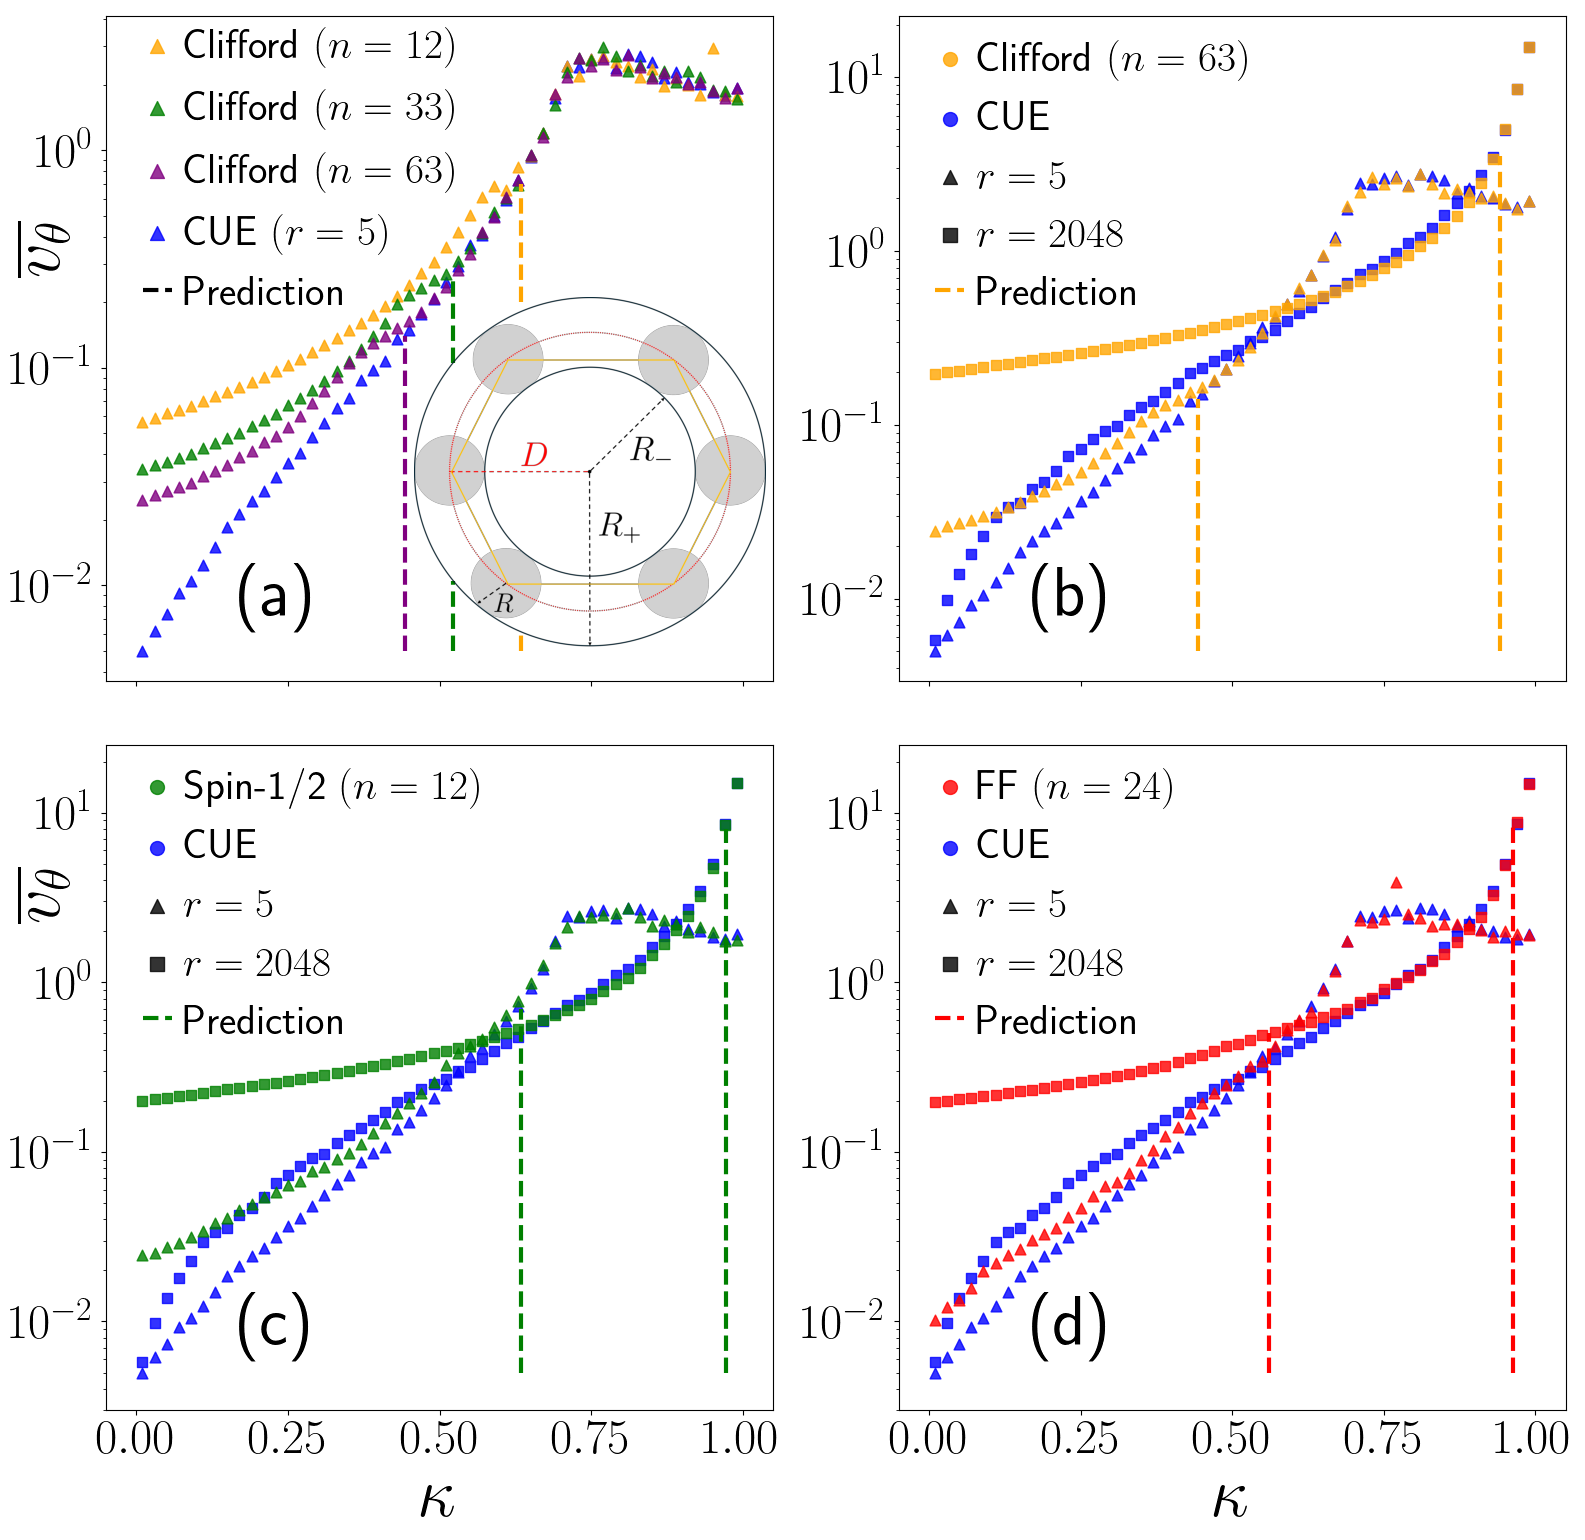

In [4]:
def k_C_R(n, r):
    f = np.sqrt( 2./n + n/8. )

    return 1 / (1 + f/np.sqrt(r)) 

# PARAMETERS

r = [5, 2048, 4095]
vec_k = list(np.around(np.arange(0.01, 1.01, 0.01), 2))
dk = 2

#===============================================================
# GET DATA

v_CUE = []
v_Clif_63 = []
v_X = []

#== CUE == #

with open("./../data/CUE_angle_velocity_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_CUE.append(v)

with open("./../data/CUE_angle_velocity_L6_r2048_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))
        
    v_CUE.append(v)

#== CLIFFORD ==#

v_Clif_12 = []
with open("./../data/Clif_angle_velocity_L6_r5_c12_v2.dat", 'r') as f:
    lines=f.readlines()
    
    for line in lines:
        v_Clif_12.append(float(line.split(',')[1]))

v_Clif_33 = []
with open("./../data/Clif_angle_velocity_L6_r5_c33_v2.dat", 'r') as f:
    lines=f.readlines()
    
    for line in lines:
        v_Clif_33.append(float(line.split(',')[1]))

with open("./../data/Clif_angle_velocity_L6_r5_c64_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_Clif_63.append(v)

with open("./../data/Clif_angle_velocity_L6_r2048_c64_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))
        
    v_Clif_63.append(v)

#== INTEGRABLE SPIN-1/2 ==#

with open("./../data/X_angle_velocity_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_X.append(v)

with open("./../data/X_angle_velocity_L6_r2048_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))
        
    v_X.append(v)

#== Free fermions ==#

v_FF = []
with open("./../data/FF_angle_velocity_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_FF.append(v)

with open("./../data/FF_angle_velocity_L6_r2048_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_FF.append(v)
        
#===============================================================
# PLOTS

colors = ['blue', 'orange', 'green', 'purple', 'red']
markers = ['o', '^', 's']
marker_size = 60
face = 'none'
fig, ax = plt.subplots(2, 2, figsize=(16, 16))  # Adjusted figsize for a single plot

# INSET OF (a)

left, bottom, width, height = [0.262, 0.56, 0.22, 0.22]
ax2 = fig.add_axes([left, bottom, width, height])

with open("./../data/Scheme.svg", "rb") as svg_file:
    svg_data = svg_file.read()
    png_data = cairosvg.svg2png(bytestring=svg_data, dpi=600)
    image = Image.open(io.BytesIO(png_data))

ax2.imshow(image)
ax2.axis('off')

# MAIN FIGURES

ax[0][0].scatter(vec_k[::dk], v_CUE[0][::dk], color=colors[0], marker='^', s=marker_size, alpha=0.8)
ax[0][0].scatter(vec_k[::dk], v_Clif_12[::dk], color=colors[1], marker='^', s=marker_size, alpha=0.8)
ax[0][0].scatter(vec_k[::dk], v_Clif_33[::dk], color=colors[2], marker='^', s=marker_size, alpha=0.8)
ax[0][0].scatter(vec_k[::dk], v_Clif_63[0][::dk], color=colors[3], marker='^', s=marker_size, alpha=0.8)


for i in range(2):

    ax[0][1].scatter(vec_k[::dk], v_Clif_63[i][::dk], color=colors[1], marker=markers[i+1], s=marker_size, alpha=0.8, zorder=3-i)
    ax[1][0].scatter(vec_k[::dk], v_X[i][::dk], color=colors[2], marker=markers[i+1], s=marker_size, alpha=0.8, zorder=3-i)
    ax[1][1].scatter(vec_k[::dk], v_FF[i][::dk], color=colors[4], marker=markers[i+1], s=marker_size, alpha=0.8, zorder=3-i)
    
    for j in range(2):
        if i == 1:
            ax[0][1].scatter(vec_k[::dk], v_CUE[j][::dk], color=colors[0], marker=markers[j+1], s=marker_size, alpha=0.8, zorder=1)
        ax[1][i].scatter(vec_k[::dk], v_CUE[j][::dk], color=colors[0], marker=markers[j+1], s=marker_size, alpha=0.8, zorder=1)
             

ax[0][0].vlines(k_C_R(12, 5), ymin=0.2, ymax=0.7, linewidth=3, linestyle='--', color=colors[1])
ax[0][0].vlines(k_C_R(12, 5), ymin=0.005, ymax=0.006, linewidth=3, linestyle='--', color=colors[1])
ax[0][0].vlines(k_C_R(33, 5), ymin=0.005, ymax=0.0105, linewidth=3, linestyle='--', color=colors[2])
ax[0][0].vlines(k_C_R(33, 5), ymin=0.105, ymax=0.26, linewidth=3, linestyle='--', color=colors[2])
ax[0][0].vlines(k_C_R(63, 5), ymin=0.005, ymax=0.14, linewidth=3, linestyle='--', color=colors[3])

ax[0][1].vlines(k_C_R(63, 5), ymin=0.005, ymax=0.14, linewidth=3, linestyle='--', color=colors[1])
ax[0][1].vlines(k_C_R(63, 2048), ymin=0.005, ymax=3.5, linewidth=3, linestyle='--', color=colors[1])

ax[1][0].vlines(k_C_R(12, 5), ymin=0.005, ymax=0.7, linewidth=3, linestyle='--', color=colors[2])
ax[1][0].vlines(k_C_R(12, 2048), ymin=0.005, ymax=8, linewidth=3, linestyle='--', color=colors[2])

ax[1][1].vlines(k_C_R(24, 5), ymin=0.005, ymax=0.5, linewidth=3, linestyle='--', color=colors[4])
ax[1][1].vlines(k_C_R(24, 2048), ymin=0.005, ymax=8.5, linewidth=3, linestyle='--', color=colors[4])


#===============================================================
# ADJUSTEMENTS

legend_font = 30
axis_ticks_font = 35
label_font = 50
text_font = 50
title_font = 40

letters = ["(a)", "(b)", "(c)", "(d)"]
count = 0

x_ticks = [0, 0.25, 0.5, 0.75, 1]
y_ticks = [0.5, 1]

x_lims = [-0.05, 1.05]
y_lims = [3e-3, 25]


# LEGEND

labels = [r"CUE $(r = 5)$", "Clifford $(n = 12)$", "Clifford $(n = 33)$", "Clifford $(n = 63)$", 'Prediction']
ax[0][0].scatter([], [], label=labels[1], color=colors[1], marker='^', s=100, alpha=0.8)
ax[0][0].scatter([], [], label=labels[2], color=colors[2], marker='^', s=100, alpha=0.8)
ax[0][0].scatter([], [], label=labels[3], color=colors[3], marker='^', s=100, alpha=0.8)
ax[0][0].scatter([], [], label=labels[0], color=colors[0], marker='^', s=100, alpha=0.8)
ax[0][0].plot([], [], label=labels[4], color='black', linestyle = '--', linewidth=3)

labels = [r"CUE", "Clifford $(n = 63)$", "$r = 5$", "$ r = 2048$", 'Prediction']
ax[0][1].scatter([], [], label=labels[1], color=colors[1], marker='o', s=100, alpha=0.8)
ax[0][1].scatter([], [], label=labels[0], color=colors[0], marker='o', s=100, alpha=0.8)
ax[0][1].scatter([], [], label=labels[2], color='black', marker=markers[1], s=100, alpha=0.8)
ax[0][1].scatter([], [], label=labels[3], color='black', marker=markers[2], s=100, alpha=0.8)
ax[0][1].plot([], [], label=labels[4], color=colors[1], linestyle = '--', linewidth=3)

labels = [r"CUE", "Spin-1/2 $(n = 12)$", "$r = 5$", "$ r = 2048$", 'Prediction']
ax[1][0].scatter([], [], label=labels[1], color=colors[2], marker='o', s=100, alpha=0.8)
ax[1][0].scatter([], [], label=labels[0], color=colors[0], marker='o', s=100, alpha=0.8)
ax[1][0].scatter([], [], label=labels[2], color='black', marker=markers[1], s=100, alpha=0.8)
ax[1][0].scatter([], [], label=labels[3], color='black', marker=markers[2], s=100, alpha=0.8)
ax[1][0].plot([], [], label=labels[4], color=colors[2], linestyle = '--', linewidth=3)

labels = [r"CUE", "FF $(n = 24)$", "$r = 5$", "$ r = 2048$", 'Prediction']
ax[1][1].scatter([], [], label=labels[1], color=colors[4], marker='o', s=100, alpha=0.8)
ax[1][1].scatter([], [], label=labels[0], color=colors[0], marker='o', s=100, alpha=0.8)
ax[1][1].scatter([], [], label=labels[2], color='black', marker=markers[1], s=100, alpha=0.8)
ax[1][1].scatter([], [], label=labels[3], color='black', marker=markers[2], s=100, alpha=0.8)
ax[1][1].plot([], [], label=labels[4], color=colors[4], linestyle = '--', linewidth=3)


for i in range(2):
    for j in range(2):

        ax[i][j].set_yscale('log')
        
        # TICKS 
        
        ax[i][j].tick_params(axis='both', labelsize=axis_ticks_font)

        ax[i][j].set_xlim(x_lims)
        if i == 1:    
            ax[i][j].set_ylim(y_lims)

        ax[i][j].xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_ticks))
        #ax[i][j].yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_ticks))
        
        if i == 0:
            ax[i][j].axes.xaxis.set_ticklabels([])

        if i == 1:
            ax[i][j].set_xlabel(r'$\kappa$', size=label_font)
        if j == 0:
            ax[i][j].set_ylabel(r'$\overline{v_{\theta}}$', size=label_font)

        if i == j == 0:
            ax[i][j].yaxis.set_label_coords(-0.05, 0.65)
        elif i == 1 and j == 0:
            ax[i][j].yaxis.set_label_coords(-0.05, 0.775)


        #LEGEND

        ax[i][j].legend(prop={'size': legend_font}, loc=[0.03, 0.53], frameon=False, columnspacing=0.5, handletextpad=0.3, handlelength=0.7, ncols=1)

        #TEXT

        color = 'black'

        ax[i][j].text(0.2, 0.1, letters[count], transform=ax[i][j].transAxes, fontsize=text_font, weight='bold', color=color)
        count += 1

#===============================================================
# FINAL PLOT SETTINGS

fig.tight_layout()
plt.gca().set_aspect('auto')
#plt.savefig("<directory>", bbox_inches='tight')
plt.show()

# Figure 3 (saved as .png)

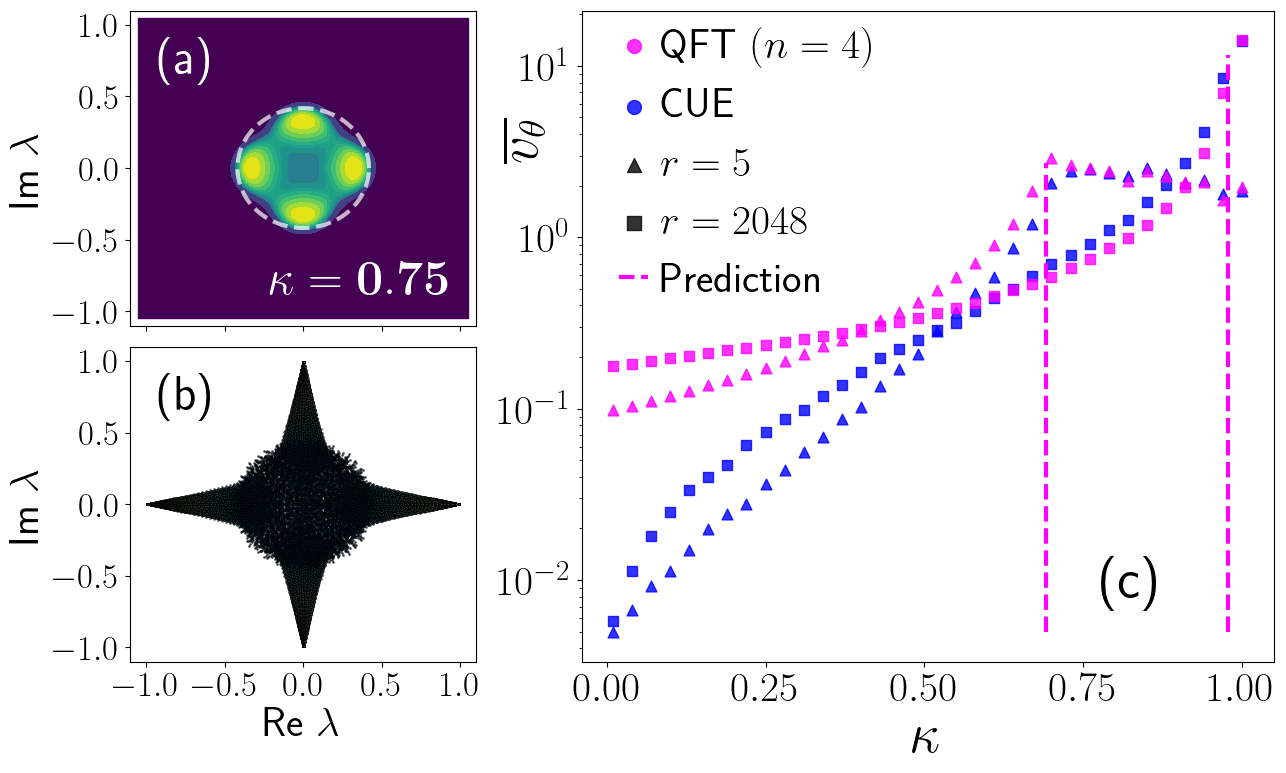

In [6]:
def k_C_R(n, r):
    f = np.sqrt( 2./n + n/8. )
    
    return 1 / (1 + f/np.sqrt(r)) 

# PARAMETERS

r = 5
vec_k = list(np.around(np.arange(0.01, 1.01, 0.01), 2))
k = [0.75]
dk = 3

#===============================================================
# GET DATA

with open("./../files/eig_QFT_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()

    spec_QFT = []
    for j in range(len(k)):
        
        index = vec_k.index(k[j])
        spec = lines[1+3*index].split(',')
        
        for i in range(len(spec)):
            spec[i] = julia_to_python_complex(spec[i])
        spec.pop()
        spec_QFT.append(spec)
    

with open("./../files/eig_QFT_L5_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    
    traj_QFT = []

    for j in range(0, len(vec_k), dk):

        traj = lines[1 + 3*j].split(',')

        for i in range(len(traj)):
            traj[i] = julia_to_python_complex(traj[i])
        traj.pop()
        traj_QFT.append(traj)

v_QFT = []
with open("./../data/QFT_angle_velocity_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_QFT.append(v)

with open("./../data/QFT_angle_velocity_L6_r2048_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_QFT.append(v)


v_CUE = []
with open("./../data/CUE_angle_velocity_L6_r5_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_CUE.append(v)

with open("./../data/CUE_angle_velocity_L6_r2048_v2.dat", 'r') as f:
    lines=f.readlines()
    v = []
    
    for line in lines:
        v.append(float(line.split(',')[1]))

    v_CUE.append(v)

#===============================================================
# PLOTS

cmap = plt.get_cmap('GnBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(traj_QFT))]

fig = plt.figure(figsize=(13, 8))
ax = fig.subplot_mosaic([[0, 2],[1, 2]],
                          gridspec_kw={'width_ratios':[1, 2]})

theta = np.linspace(0, 2* np.pi, 100)


ax[0].fill_betweenx(y=[-1.05, 1.05], x1=-1.05, x2=1.05, color='#440154', zorder=0)

re = [num.real for num in spec_QFT[0]]
im = [num.imag for num in spec_QFT[0]]

sns.kdeplot(x=re, y=im, cmap="viridis", fill=True, bw_adjust=1, cbar=False, thresh=0.1, clip=[[-1.05, 1.05], [-1.05, 1.05]], ax=ax[0])

x = Rplus(k[0], r)*np.cos(theta)
y = Rplus(k[0], r)*np.sin(theta)
ax[0].plot(x, y, color='white', linewidth=3, alpha=0.7, linestyle='--')

x = Rminus(k[0], r)*np.cos(theta)
y = Rminus(k[0], r)*np.sin(theta)
ax[0].plot(x, y, color='white', linewidth=3, alpha=0.7, linestyle='--')


for i in range(len(traj_QFT)):
    re = [num.real for num in traj_QFT[i]]
    im = [num.imag for num in traj_QFT[i]]
    
    ax[1].scatter(re, im, color=colors[i], marker='o', s=1, alpha=0.6, ec='black', lw=1)



colors = ['blue', 'magenta', 'orange', 'green', 'purple']
markers = ['o', '^', 's']
marker_size = 60

for i in range(2):
    ax[2].scatter(vec_k[::dk], v_QFT[i][::dk], color=colors[1], marker=markers[i+1], s=marker_size, alpha=0.8, zorder=2)
    ax[2].scatter(vec_k[::dk], v_CUE[i][::dk], color=colors[0], marker=markers[i+1], s=marker_size, alpha=0.8, zorder=1)
             

ax[2].vlines(k_C_R(4, 5), ymin=0.005, ymax=2.7, linewidth=3, linestyle='--', color=colors[1])
ax[2].vlines(k_C_R(4, 2048), ymin=0.005, ymax=11.5, linewidth=3, linestyle='--', color=colors[1])



#===============================================================
# ADJUSTEMENTS


legend_font = 30
axis_ticks_font = 30
label_font = 30
text_font = 30
title_font = 30

letters = ["(a)", "(b)", "(c)"]
count = 0

y_ticks = [-1, -0.5, 0, 0.5, 1]

x_lims = [-1.1, 1.1]
y_lims = [-1.1, 1.1]


x_labels = [r'Re $\lambda$', r'Re $\lambda$', r'$\kappa$']
y_labels = [r'Im $\lambda$', r'Im $\lambda$', r'$\overline{v_{\theta}}$']

# LEGEND

labels = [r"CUE", "QFT $(n = 4)$", "$r = 5$", "$ r = 2048$", 'Prediction']
ax[2].scatter([], [], label=labels[1], color=colors[1], marker='o', s=100, alpha=0.8)
ax[2].scatter([], [], label=labels[0], color=colors[0], marker='o', s=100, alpha=0.8)
ax[2].scatter([], [], label=labels[2], color='black', marker=markers[1], s=100, alpha=0.8)
ax[2].scatter([], [], label=labels[3], color='black', marker=markers[2], s=100, alpha=0.8)
ax[2].plot([], [], label=labels[4], color=colors[1], linestyle = '--', linewidth=3)

ax[2].legend(prop={'size': legend_font}, loc=[0.03, 0.53], frameon=False, columnspacing=0.5, handletextpad=0.3, handlelength=0.7, ncols=1)


ax[2].set_yscale('log')

for i in range(len(ax)):

    # FONT SIZES

    if i < 2:
        legend_font = 20
        axis_ticks_font = 25
        label_font = 30
        text_font = 35
        title_font = 20
    else:
        legend_font = 30
        axis_ticks_font = 30
        label_font = 40
        text_font = 40
        title_font = 30
    
    
    # LABELS
    if i != 0:
        ax[i].set_xlabel(x_labels[i], size=label_font)
        
    ax[i].set_ylabel(y_labels[i], size=label_font)

    if i == 0:
        ax[i].axes.xaxis.set_ticklabels([])

    if i == 2:
        ax[i].yaxis.set_label_coords(-0.05, 0.8)  

    # TICKS 
    
    x_ticks = [-1, -0.5, 0, 0.5, 1]
    
    if i == 2:
        x_ticks = [0, 0.25, 0.5, 0.75, 1]
        
    ax[i].tick_params(axis='both', labelsize=axis_ticks_font)

    
    if i < 2:   
        
        ax[i].set_xlim(x_lims)
        ax[i].set_ylim(y_lims)
        ax[i].yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_ticks))

    ax[i].xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_ticks))

    # TEXT
    color = 'black'
    if i == 0:
        color = 'white'

    x_pos = 0.08
    y_pos = 0.8
    if i == 2:
        x_pos = 0.75
        y_pos = 0.1

    ax[i].text(x_pos, y_pos, letters[count], transform=ax[i].transAxes, fontsize=text_font, weight='bold', color=color)
    count += 1

    if i == 0:
        ax[i].text(0.4, 0.1, rf'$\mathbf{{\kappa = {k[i]:.2f}}}$', transform=ax[i].transAxes, fontsize=text_font, weight='bold', color=color)

#===============================================================
# FINAL PLOT SETTINGS

fig.tight_layout()
plt.gca().set_aspect('auto')
#plt.savefig("<directory>", bbox_inches='tight')
plt.show()